 <h1> <center> Linear Regression  </center></h1>

Def : Linear regression attempts to model the relationship between two variables by fitting 
        a linear equation (= a straight line) to the observed data. One variable is considered to be an explanatory                variable (e.g. your income), and the other is considered to be a dependent variable (e.g. your expenses).

Mathematical Equation : y = m x + c
    
    y = Target Variable.(output)
    
    x = input Variable.
    
    m = Slope of the Line . (slope/Coeff).
    
    c = Intercept (The line meets at axis.)
    
    
    #Here The Values of the Target Variable is Continuos.
    
    

<img src="https://acadgild.com/blog/wp-content/uploads/2018/07/Linear-Regression.jpg">

In [1]:
# Programme on the Linear Regression..

In [2]:
#importing the Required Libraries..

In [3]:
import pandas as pd
import numpy as np

In [4]:
#Importing the dataset.Here we used the Boston Housing Dataset ..
from sklearn.datasets import load_boston

bost = load_boston()
bost.keys()





dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
#Here data are the labels of data and feature_names are the col names and target is the target varible. 
Boston = pd.DataFrame(bost['data'],columns=bost['feature_names'])
Boston['target']= bost['target']

In [6]:
#Printing the first 5  rows Data from the Dataset.

Boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [9]:
#Before going th the Algorithm .we remove The unwanted Data and Null from the Dataset.


Boston[0:5]

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [10]:
Boston.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT      target  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [11]:
Boston.info()

#from here getting to knowing that We dont have any Null.

#And now Data is ready to Fit to the Model.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
#Importing the LinearRegression ALgorithm from the SKlearn.

# sklearn -----> Linear_model ----->LinearRegression.

from sklearn.linear_model import LinearRegression

In [13]:
#creating Object\instance  to the Model..

leg = LinearRegression()

In [21]:
# Adding the Feature and Target to X and Y Variables.
# Here We are taking the "crim" as feature and "MEDV" as Target variable.

x = Boston[["CRIM"] ]# ---------> Features variable.(Independent variable)

y = Boston[["target"]]  # -------->Target Variable.(Dependent variable)

In [22]:
# Here we are making 4 parts as Train and Test sets.

# sklearn -----> Model_selection -------> train_test_split.

from sklearn.model_selection import train_test_split

In [23]:
# Here Dataset is made into train,test and train for -->80% data and test for ----> 20% data.
#random_state is used to get same output for every execution.

x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size = 0.2 ,random_state = 10)

In [24]:
# Training the model using Fit method  by Leg instance... leg = LinearRegression()

leg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
#Here we are Predicting the output for the x_test from Model.

y_pred = leg.predict(x_test)

In [26]:
#Actual values ..

y_test.head(5)

target
305    28.4
193    31.1
65     23.5
349    26.6
151    19.6

In [27]:
#predicted Values from the Model for given X_test.

y_pred[0:5]

array([[23.30308867],
       [23.31556876],
       [23.31027268],
       [23.31286954],
       [22.75659937]])

In [28]:
# To know the Error between actual and predicted values ..

from sklearn.metrics import mean_squared_error

In [29]:
# y_test and y_pred. 

mean_squared_error(y_test,y_pred)

99.9378139371986

In [30]:
#Visualizing the Data..

In [31]:
%matplotlib notebook

In [32]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


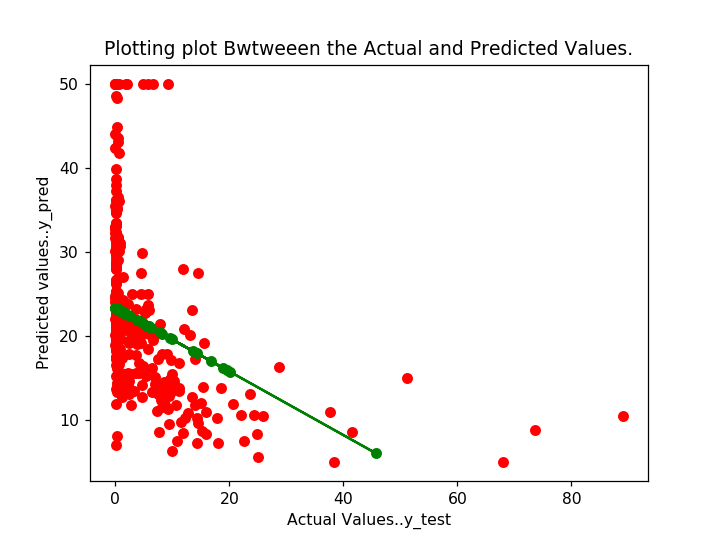

In [58]:
plt.figure()

plt.scatter(x_train,y_train,marker='o',c='Red')

plt.plot(x_test,y_pred,marker='o',c='green')

plt.xlabel("Actual Values..y_test")

plt.ylabel("Predicted values..y_pred")

plt.title("Plotting plot Bwtweeen the Actual and Predicted Values.")

plt.show()

In [34]:
#To check the Accuracy of the Model....
#1.Using score

In [35]:
#leg = LinearRegression()

In [36]:
leg.score(x_train,y_train)*100

15.41265087005651

In [37]:
leg.score(x_test,y_test)*100

4.439564028535603

In [38]:
#Here the Model Accuracy is Very Low Because of the Single independent Feature.

#If you take maultiple Features in the X value.It is called Multiple Linear Regression.

#WE see the Multiple Linear Regression in the Next NoteBook.

# Linear Regression Example-2


In [39]:
#Own Example Taken by me..

d = {'roomsize':[2,3,4,5,6],'price':[200,300,400,500,600]}
print(d)

{'roomsize': [2, 3, 4, 5, 6], 'price': [200, 300, 400, 500, 600]}


In [40]:
#changing dict to Dataframe..

df = pd.DataFrame(d)

In [41]:
df.head()

roomsize  price
0         2    200
1         3    300
2         4    400
3         5    500
4         6    600

In [42]:
#checking the null values..

df.isna().sum()

roomsize    0
price       0
dtype: int64

In [43]:
#Applying the Linear Regression Model do the Dataframe -df.

from sklearn.linear_model import LinearRegression

In [44]:
linear = LinearRegression()

In [45]:
X = df[['roomsize']]
y = df[['price']]

In [46]:
#Training the Model.
linear.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#Testing the Model.
linear.predict(X)

array([[200.],
       [300.],
       [400.],
       [500.],
       [600.]])

In [48]:
#Predicting the MOdel ..

linear.predict([[10]])

array([[1000.]])

In [54]:
#checking the Score of the Modelin training andd Testing. Here we got the Accuracy of the Model.

linear.score(X,y)*100

100.0

In [52]:
#Here we got Accuracy of the Model 100%.

In [55]:
#Here the data is overfitted .THis leads to 100.

In [56]:
#The good model predicts between 75 - 95 % of the data.